In [1]:
from pyspark.sql import SparkSession
from PIL import Image
spark = SparkSession.builder.appName("MyApp").config("spark.jars.packages", "com.microsoft.ml.spark:mmlspark_2.12:1.0.0-rc3-43-54379bf7-SNAPSHOT").config("spark.driver.memory", "15g").config("spark.jars.repositories", "https://mmlspark.azureedge.net/maven").getOrCreate()
spark.catalog.clearCache()

import os
import mmlspark
import numpy as np
import pandas as pd
from mmlspark.opencv import toNDArray
from mmlspark.io import *
from mmlspark.opencv import ImageTransformer
import cv2 as cv
from glob import glob
from matplotlib.pyplot import *
from random import shuffle
from sklearn.model_selection import train_test_split

In [2]:
imageDir = 'data/letter_images'
df_images = spark.read.format("image").load(imageDir)
df_images.printSchema()


root
 |-- image: struct (nullable = true)
 |    |-- origin: string (nullable = true)
 |    |-- height: integer (nullable = true)
 |    |-- width: integer (nullable = true)
 |    |-- nChannels: integer (nullable = true)
 |    |-- mode: integer (nullable = true)
 |    |-- data: binary (nullable = true)



In [3]:
df_images.count()

7343

In [16]:
# tr = ImageTransformer().setOutputCol("transformed").resize(height = 128, width = 128).crop(
#     0, 0, height = 128, width = 128)

# small = tr.transform(df_images).select("transformed")

# data = small.take(7343)

for _ in range(7343):
    im = data[_][0]                  
    m = Image.fromarray(toNDArray(im)).convert('L')
    m.save('data/grayscale_images/{}'.format(data[_]['transformed']['origin'].split('/')[-1]))

In [26]:
for _ in glob('data/grayscale_images/*.jpg'):
    r, t = cv.threshold(cv.imread(_, 0), 127, 255, cv.THRESH_BINARY_INV)
    cv.imwrite('data/binary_images/{}'.format(_.split('/')[-1]), t)

In [52]:
for _ in glob('data/binary_images/*.jpg'):
    im = cv.imread(_, 0)
    if not ('_quest.jpg' in _ or '_dash.jpg' in _ or '_comma.jpg' in _ or '_colon.jpg' in _ or '_dot.jpg' in _ 
    or '_s_quote.jpg' in _ or '_quote.jpg' in _ or '_d_quote.jpg' in _ or '_H.jpg' in _):
        total_ = list(np.sum(im, axis=1))
        ind_ = [i for i, j in enumerate(total_) if j >= np.percentile(total_, 95)]
        for k in ind_:
            im[k, :] = 0
    cv.imwrite('data/no_header_images/{}'.format(_.split('/')[-1]), im)

In [40]:
i = cv.imread('data/binary_images/image_115_vaa.jpg', 0)

(array([70., 13., 16., 16.,  5.,  0.,  2.,  0.,  0.,  6.]),
 array([    0. ,  2852.7,  5705.4,  8558.1, 11410.8, 14263.5, 17116.2,
        19968.9, 22821.6, 25674.3, 28527. ]),
 <a list of 10 Patch objects>)

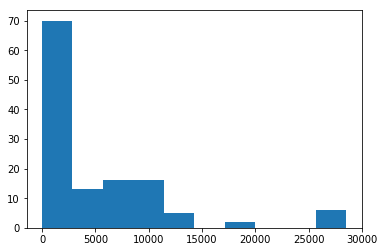

In [41]:
hist(np.sum(i, axis=1))

In [53]:
i = cv.imread('data/no_header_images/image_376_saH.jpg', 0)

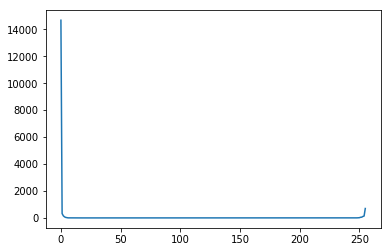

In [54]:
histr = cv.calcHist([i],[0],None,[256],[0,256])
plot(histr)

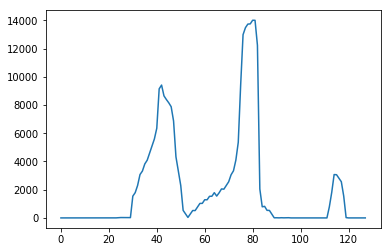

In [57]:
plot(np.sum(i, axis=0))

In [31]:
count_ = 0
for _ in glob('data/binary_images/*.jpg'):
    col_start = 0
    col_end = 127
    row_start = 0
    row_end = 127
    
    im = cv.imread(_, 0)
    if '_quest.jpg' in _ or '_dash.jpg' in _ or '_comma.jpg' in _ or '_colon.jpg' in _ or '_dot.jpg' in _ or '_s_quote.jpg' in _ or '_quote.jpg' in _ or '_d_quote.jpg' in _ or '_H.jpg' in _:
    
        vert_sum = list(np.sum(im, axis=0))

        for j, k in enumerate(vert_sum):
            if k != 0:
                col_start = j
                break

        vert_sum.reverse()
        for j, k in enumerate(vert_sum):
            if k != 0:
                col_end = 127 - j
                break

        horz_sum = list(np.sum(im, axis=1))

        for j, k in enumerate(horz_sum):
            if k != 0:
                row_start = j
                break

        horz_sum.reverse()
        for j, k in enumerate(horz_sum):
            if k != 0:
                row_end = 127 - j
                break

        cv.imwrite('data/cropped_images/{}'.format(_.split('/')[-1]), cv.resize(im[row_start:row_end, col_start:col_end], (256, 256)))
        count_ += 1
        print(count_)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178


In [40]:
class_labels = list()

for _ in l:
    c = _.split('_')[-1].split('.jpg')[0]
    if c not in class_labels:
        class_labels.append(c)

In [43]:
for _ in class_labels:
    try:
        os.mkdir('data/train/{}'.format(_))
        os.mkdir('data/validation/{}'.format(_))
    except FileExistsError:
        print(_)
        os.mkdir('data/train/{}_'.format(_))
        os.mkdir('data/validation/{}_'.format(_))

sha
N
Shta
NaaM
Na
NaM
da
tah
chCha
shi
ne
Te
Naa
daM
Rya
Ni
STa
shaa
Ta
I
h
Daa
she
ShaM
Di
DhaM
VYA
shu
TaM
Gyaa
Tii
dRRI
Dha
Tha
ShaH
M
NaH
Ti
krii
TuH
du


In [55]:
len(l), len(train_)+len(test_)

(7333, 7333)

In [8]:
for _ in train_:
    i = _.split('/')[-1]
    cv.imwrite('data/train/{}'.format(i), cv.imread(_, 0))

In [ ]:
for _ in test_:
    i = _.split('/')[-1]
    cv.imwrite('data/train/{}'.format(i), cv.imread(_, 0))

In [44]:
def get_folder_name(str_):
    return str_.split('_')[-1].split('.jpg')[0]

In [45]:
for _ in range(5000):
    shuffle(l)

df_folder = pd.DataFrame({'full_path': l, 'folder': list(map(get_folder_name, l))})

In [47]:
df_folder.head(9)

,full_path,folder
0,data/cropped_images/image_4822_ba.jpg,ba
1,data/cropped_images/image_4941_bh.jpg,bh
2,data/cropped_images/image_3312_pra.jpg,pra
3,data/cropped_images/image_7006_raa.jpg,raa
4,data/cropped_images/image_1581_roo.jpg,roo
5,data/cropped_images/image_7522_bha.jpg,bha
6,data/cropped_images/image_715_va.jpg,va
7,data/cropped_images/image_3151_shrvaa.jpg,shrvaa
8,data/cropped_images/image_5745_ma.jpg,ma


In [48]:
df_count = df_folder.folder.value_counts().reset_index(name='counts_').rename(columns={'index': 'folder'})
singles_ = list(df_count[df_count.counts_ == 1].folder.values)

In [49]:
df_non_singles = df_folder[~df_folder.folder.isin(singles_)]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df_non_singles.full_path, df_non_singles.folder, test_size=0.2, random_state=42, stratify=df_non_singles.folder)


In [51]:
train_ = pd.concat([X_train, y_train], ignore_index=False, axis=1)

In [52]:
test_ = pd.concat([X_test, y_test], ignore_index=False, axis=1)

In [53]:
df_singles = df_folder[df_folder.folder.isin(singles_)]

In [54]:
train_ = pd.concat([train_, df_singles], axis=0, ignore_index=True, sort=True)

In [57]:
folders_ = list(train_.folder.values)
images_ = list(train_.full_path.values)
folder_names = os.listdir('data/train/')

for _, __ in enumerate(folders_):
    r, t = cv.threshold(cv.imread(images_[_], 0), 127, 255, cv.THRESH_BINARY)
    if __ in folder_names:
        cv.imwrite('data/train/{0}/{1}'.format(__, images_[_].split('/')[-1]), t)
    elif __+'_' in folder_names:
        cv.imwrite('data/train/{0}/{1}'.format(__+'_', images_[_].split('/')[-1]), t)
    else:
        print(__)

In [58]:
folders_ = list(test_.folder.values)
images_ = list(test_.full_path.values)
folder_names = os.listdir('data/validation/')

for _, __ in enumerate(folders_):
    r, t = cv.threshold(cv.imread(images_[_], 0), 127, 255, cv.THRESH_BINARY)
    if __ in folder_names:
        cv.imwrite('data/validation/{0}/{1}'.format(__, images_[_].split('/')[-1]), t)
    elif __+'_' in folder_names:
        cv.imwrite('data/validation/{0}/{1}'.format(__+'_', images_[_].split('/')[-1]), t)
    else:
        print(__)

In [59]:
for _ in os.listdir('data/validation/'):
    try:
        print(_)
        os.rmdir('data/validation/{}'.format(_))
    except OSError:
        pass

yyM
nnau
tii
ndraH
nta
uu
ndha
chcha
chi
ktaM
nto
yuH
Gyaa_
tsya
chchh
mba
tah_
se
rbhe
xaaM
myaa
ye
va
kno
gho
shu_
trii
ndhuH
mau
bhaa
staM
gha
nti
rshaa
maH
khe
syaaH
mRRi
gaa
cha
roo
Ti_
sva
pe
knu
ttaaM
tiH
psya
maa
ndaH
vi
svaa
ndhu
rjaa
daM_
nnaa
shva
ntu
yyaM
suu
pii
rdha
kaM
tkaa
nnaH
ghi
ndaa
Sshaa
taaH
ga
ntyaaH
he
ntaM
rti
di
smi
mya
rshve
tyai
.DS_Store
dhiH
tri
ShaM_
DhaM_
nu
Du
ShTiH
hyaa
rtu
ne_
pra
ni
M_
lii
shcha
tRRi
dot
ShNa
ma
kuu
hii
rta
tsaa
saM
gi
dhii
Da
sma
ShtiiM
ke
hRRi
snaa
yaM
tyaa
Dh
mu
tra
pte
do
yaaM
txa
staaM
gu
tnii
bhya
niiM
shchi
She
na
mpa
mi
tyaaH
N_
shaM
pRRi
chaa
rtaM
ShTvaa
tye
tva
quote
dau
raaM
jaa
nau
jaH
chCha_
iti
tkRRi
ntii
dha
vya
rpa
ci
ddha
chChaa
ii
tuu
shi_
laM
ee
traaH
ja
stri
gyaa
straa
kra
vaaM
gre
nde
ch
kyaM
STvaa
thaH
NaaM_
gRRi
thaa
haM
dhaM
tuH
rgha
sii
puu
khii
ddhi
le
dhi
Tha_
ruM
da_
naH
colon
chchha
ShTaM
ji
I_
rya
rve
daa
dhu
naaM
NaM_
dbhiH
ntyaa
daH
stra
bhe
Na_
ddhu
naa
tnaM
ryo
xya
syaM
khyaaH
kri
xi
r
ttaH
dRRI_
te


In [2]:
l = list()
for _ in os.listdir('data/image_data/train/'):
    for i in glob('data/image_data/train/{}/*.jpg'.format(_)):
        t = cv.imread(i, 0)
        l.append(t)

In [3]:
for _ in os.listdir('data/image_data/validation/'):
    for i in glob('data/image_data/validation/{}/*.jpg'.format(_)):
        t = cv.imread(i, 0)
        l.append(t)